# $\color{purple}{\text{Data Wrangling Project - WeRateDogs Twitter Data}}$

By Osama Mohamed Naguib



### Data comes from 3 different sources and with 3 different formats:
* Programmatic Download of `image-prediciton.tsv`
* Manual Download of `twitter-archive-enhanced.csv`
* Querying Twitter API and Composing json to txt file `tweet_json.txt`


## $\color{green}{\text{I) Data Gathering Steps:}}$


### 1. Importing Libraries

In [1]:
#Importing useful libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 2. Downloading& reading Image Prediction tsv file from UDACITY servers

In [2]:
#Using requests library to download tsv file from udacity server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url, verify = False)
file_name = url.split('/')[-1]

if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(r.content)
df_image_predict = pd.read_csv(file_name, sep='\t')
df_image_predict[:1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


### 3. Uploading& reading Twitter Archived Enhanced Data

In [3]:
# After Uploading csv file using jupyter nottbook, then read csv as a pandas DataFrame
df_twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_enhanced[:2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 4. Query Twitter API Data

In [4]:
#Setting Credentials: 
consumer_key = 'K9x3ye1tlYWnmWgW2NX4MPebc'
consumer_secret = 'kZM3PrzVshWJ1qQPXIf3nki6zBMHvxXeYIBtgW3oTACjtvg21P'
access_token = '75779358-jXUONA5yDh7kCWtllW8S0plNbHG20zn0QGf7G2gqr'
access_secret = '8OmvxHLAwmeF7ZuqZ4qCOnP2fKzu0An43rEx3igLrgFjZ'

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
# Testing with one tweet querying& printing it:
exp_tweet = api.get_status(df_twitter_enhanced.tweet_id[1000], tweet_mode = 'extended')
content = exp_tweet._json
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [8]:
# Exploring Columns of the file
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [9]:
#querying entire tweets
#creating an error collecting list to add all the errros in
errors_tweet = []
#checking if the json.txt file is in hte path; saving time for re-querying 
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w', encoding = "utf8") as file:
        for tweet_id in df_twitter_enhanced['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                #setting each tweet in a separate line
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors_tweet.append(tweet_id)

In [10]:
len(errors_tweet)

0

In [11]:
df_list = []
with open ("tweet_json.txt", 'r') as file:
    for line in file:
        tweet = json.loads(line)
        df_list.append(tweet)
api_df = pd.DataFrame(df_list)
api_df[:1]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",35284,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7445,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2331 non-null object
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null object
id                               2331 non-null int64
id_str                           2331 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [13]:
api_df = api_df[['id' , 'created_at', 'retweet_count' , 'favorite_count']]
api_df.columns

Index(['id', 'created_at', 'retweet_count', 'favorite_count'], dtype='object')

In [14]:
#api_df[:2]

In [15]:
# Saving api dataframe to csv file to explore it visully in jupyter notebook
api_df.to_csv('api_df.csv', index=False)

## $\color{green}{\text{II) Data Assessment Steps:}}$

### 1. Image Prediction Data (tsv file)


* Visual Assessment

In [16]:
df_image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
df_image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
df_image_predict.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
df_image_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1552,793150605191548928,https://pbs.twimg.com/media/CwHWOZ7W8AAHv8S.jpg,1,Italian_greyhound,0.193869,True,bluetick,0.160380,True,standard_poodle,0.125982,True
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True
828,693590843962331137,https://pbs.twimg.com/media/CaAhMb1XEAAB6Bz.jpg,1,dining_table,0.383448,False,grey_fox,0.103191,False,Siamese_cat,0.098256,False
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone_wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False
1059,714982300363173890,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,0.944376,True,beagle,0.025435,True,Ibizan_hound,0.009962,True
501,675853064436391936,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,Labrador_retriever,0.784398,True,Siberian_husky,0.055925,True,beagle,0.022750,True
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True
1434,773670353721753600,https://pbs.twimg.com/media/CryhFC0XEAA9wp_.jpg,1,Old_English_sheepdog,0.969311,True,Maltese_dog,0.013243,True,soft-coated_wheaten_terrier,0.004857,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


* Programmatic Assessment

In [20]:
df_image_predict.shape

(2075, 12)

In [21]:
df_image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df_image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
df_image_predict.duplicated().sum()

0

* No Duplicates are found in `Image Prediction.tsv`

### 2. Twitter Archived Enhanced Data (csv file)

* Visual Assessment

In [25]:
df_twitter_enhanced[:1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [26]:
df_twitter_enhanced.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
769,777189768882946048,NaN,NaN,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777189768...,12,10,Jeffrey,None,None,None,None
1162,723688335806480385,NaN,NaN,2016-04-23 01:41:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reginald. He starts screaming at rando...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723688335...,12,10,Reginald,None,None,None,None
703,785927819176054784,NaN,NaN,2016-10-11 19:39:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's strives to be the best pot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785927819...,12,10,Lucy,None,None,None,None
1324,706169069255446529,NaN,NaN,2016-03-05 17:26:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",He was doing his best. 12/10 I'll be his lawye...,NaN,NaN,NaN,https://twitter.com/wgnnews/status/70616592080...,12,10,None,None,None,None,None
1313,706904523814649856,NaN,NaN,2016-03-07 18:09:06 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Ever seen a dog pet another dog? Both 13/10 tr...,NaN,NaN,NaN,https://vine.co/v/iXQAm5Lrgrh,13,10,None,None,None,None,None
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
879,760641137271070720,NaN,NaN,2016-08-03 00:59:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Theo. He can walk on water. Still comi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760641137...,12,10,Theo,None,None,None,None
1845,675845657354215424,NaN,NaN,2015-12-13 01:12:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,None,None,pupper,None
44,883838122936631299,NaN,NaN,2017-07-09 00:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Noah. He can't believe someone made th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883838122...,12,10,Noah,None,None,None,None
348,831670449226514432,NaN,NaN,2017-02-15 01:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831670449...,13,10,Daisy,None,None,None,None


In [27]:
df_twitter_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [28]:
df_twitter_enhanced.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


* Programmatic Assessment

In [29]:
df_twitter_enhanced.shape

(2356, 17)

In [30]:
df_twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [31]:
df_twitter_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [32]:
df_twitter_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


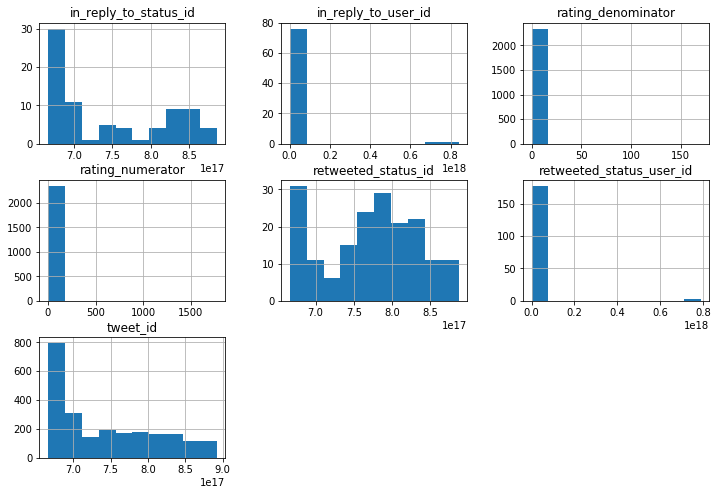

In [33]:
df_twitter_enhanced.hist(figsize=(12,8));

In [34]:
df_twitter_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [35]:
df_twitter_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Buddy           7
an              7
Daisy           7
Toby            7
Dave            6
Milo            6
Jax             6
Oscar           6
Bella           6
Stanley         6
Koda            6
Leo             6
Jack            6
Rusty           6
Scout           6
Louis           5
             ... 
Sweets          1
Newt            1
Scruffers       1
Monster         1
Edmund          1
Marlee          1
Alf             1
Cal             1
JD              1
Crawford        1
Striker         1
Chadrick        1
Steve           1
Eugene          1
Mary            1
Taz             1
Juckson         1
Lenox           1
Christoper      1
Willow          1
Staniel         1
Yoda            1
Chevy           1
Anthony         1
Spark     

In [36]:
df_twitter_enhanced[df_twitter_enhanced['rating_numerator'] > 14]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [37]:
# spoting bad dog names which is <= 2 letters length
bad_dog_names = df_twitter_enhanced[df_twitter_enhanced['name'].apply(len) <= 2]
bad_dog_names.name.value_counts()

a     55
Bo     9
an     7
JD     1
O      1
Mo     1
Jo     1
by     1
my     1
Al     1
Ed     1
Name: name, dtype: int64

In [38]:
# check for the unique values of those non titled
untitled_dog_names = df_twitter_enhanced.name.loc[df_twitter_enhanced.name.str.istitle() == False]
untitled_dog_names.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [39]:
# Adressing frequency of occurence of untitled dog names
untitled_dog_names.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
mad              2
CeCe             2
getting          2
actually         2
not              2
by               1
my               1
all              1
such             1
life             1
DayZ             1
unacceptable     1
infuriating      1
light            1
this             1
officially       1
DonDon           1
BeBe             1
incredibly       1
his              1
JD               1
space            1
old              1
Name: name, dtype: int64

In [40]:
df_twitter_enhanced.duplicated().sum()

0

* No duplicates are found in `twitter-archive-enhanced.csv`



### 3. Twitter API Data (json to txt file)

* Visual Assessment

In [41]:
api_df.sample(15)

,id,created_at,retweet_count,favorite_count
1498,690649993829576704,Fri Jan 22 21:39:24 +0000 2016,264,1261
169,857746408056729600,Fri Apr 28 00:00:54 +0000 2017,9844,32276
685,785927819176054784,Tue Oct 11 19:39:28 +0000 2016,3145,11312
321,832645525019123713,Fri Feb 17 17:38:57 +0000 2017,519,2875
1735,678708137298427904,Sun Dec 20 22:46:44 +0000 2015,2312,5381
2068,670780561024270336,Sun Nov 29 01:45:22 +0000 2015,267,744
2106,670086499208155136,Fri Nov 27 03:47:25 +0000 2015,231,656
1300,706169069255446529,Sat Mar 05 17:26:40 +0000 2016,2133,3781
1822,675820929667219457,Sat Dec 12 23:34:00 +0000 2015,224,998
159,859924526012018688,Thu May 04 00:15:58 +0000 2017,3781,18434


In [42]:
api_df.head()

,id,created_at,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,7445,35284
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5529,30528
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3656,22965
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7616,38565
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,8207,36854


In [43]:
api_df.tail()

,id,created_at,retweet_count,favorite_count
2326,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,39,95
2327,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,123,263
2328,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,39,108
2329,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,41,118
2330,666020888022790149,Sun Nov 15 22:32:08 +0000 2015,445,2353


* Programmatic Assessment

In [44]:
api_df.shape

(2331, 4)

In [45]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id                2331 non-null int64
created_at        2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [46]:
api_df.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2614.860146,7374.030030
std,6.823170e+16,4424.418828,11452.335223
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,529.500000,1281.500000
50%,7.182469e+17,1222.000000,3201.000000
75%,7.986692e+17,3036.500000,9025.500000
max,8.924206e+17,75143.000000,152065.000000


In [47]:
api_df.columns.duplicated()

array([False, False, False, False], dtype=bool)

In [48]:
api_df.duplicated().sum()

0

* No duplicates are found in `twitter_API.txt`

### $\color{orange}{\text{Data Assessment Conclusions:}}$

More than 20 issues had been identified and will be illustrated below separating the 2 categories; the Quality Issues and the Tidiness Issues.


### $\color{orange}{\text{A) Quality Issues:}}$

#### 1. Completeness:
##### `df_twitter_enhanced`
  * Missing values and Redundancy of original tweets and retweets should be eliminated.


##### `api_df`
  * Some Tweets status are missing (26) and can't be recovered.


#### 2. Validity:
##### `df_image_predict`
  * tweet_id is int, while it should be str.
  * Replace underscore in breeds values with space and title all breeds values (p1 &p2& p3).

##### `df_twitter_enhanced`
  * tweet_id is int, while it should be str.
  * timestamp is str, while it should be in datetime format.
  * Column name of "name" is not indicative enough, and shall be changed to dog_name.
  * "source" column contains html tags `<a>`.
  
##### `api_df`
  * id is int; and so it should be coverted into object.
  * created_at is str, while it should be in datetime format.


#### 3. Accuracy:
`df_image_predict`
* some predictions are not for dogs.

`df_twitter_enhanced`
  * Some Dog names are too short to be true, such as (a, Bo, an, my, Al, by, Jo, Mo, JD, Ed, O), while others are invalid such as (mad, very, just, his, actually, getting, this, unacceptable, all, old, infuriating, the, officially, life, light, space).
  i.e. It seems that all correct dog names are titled while untitled values are erroneous.
  * Neominator& denominator columns contains Outliers such as in row 315 (960/00) and in row 979 (1776/10).


#### 4. Consistency:
  * "None" instead of NaN in `df_twitter_enhanced`.


### $\color{orange}{\text{B) Tidiness Issues:}}$
`df_twitter_enhanced`  
  * rating_numerator and rating_denominator columns should be merged in one column with name dog_rating and normalized out of 10.
  * 4 different columns represents dogs classification where values are expressed as categories, so the 4 columns shall be merged into one column.

`df_image_predict`
  * Merging p1_conf, p2_conf and p3_conf, to get one confidence column (one variable in one header) [will not be cleaned].
  * Merging p1_dog, p2_dog and p3_dog [will not be cleaned].
  * Image prediction data belongs to archive dataset.

`The THREE datasets`
  * No. of rows is not consistent across the 3 datasets; image prediction; archive; and api, which are 2075, 2356, and 2330 respectively.
  * "tweet_id" column name in `df_twitter_enhanced` and in `df_image_predict` are not consistent in naming nor in datatype with "id_str" column name in `api_df`.

## $\color{green}{\text{III) Cleaning Data:}}$




In [49]:
# Doing Cleaning process on copies of the original dataframes:
pred_clean = df_image_predict.copy()
archive_clean = df_twitter_enhanced.copy()
api_clean = api_df.copy()

In [50]:
# Cheaching no. of rows and columns in each df, as a prepration for cleaning and merging
pred_clean.shape[0] , archive_clean.shape[0] , api_clean.shape[0]

(2075, 2356, 2331)

**Define #1**
  1. Using image prediction df to remove tweets ids without photos in archive by:
      * creating a list with tweeet id without images
      * Removing tweets without imaages from archive


**Code #1**

In [51]:
# Checking archive rows no. before removing tweets without images
archive_clean.shape[0]

2356

In [52]:
# creating a list of tweets that have no images "tweets_with_image"
tweets_with_image = list(pred_clean.tweet_id.unique())

In [53]:
len(tweets_with_image) , pred_clean.tweet_id.nunique()

(2075, 2075)

In [54]:
# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_clean.tweet_id.isin(tweets_with_image).sum()

True

In [55]:
# Removing tweets without images from archive
archive_clean = archive_clean[archive_clean.tweet_id.isin(tweets_with_image)]

**Test #1**

In [56]:
# Checking archive rows no. after removing tweets without images

archive_clean.shape[0]

2075

---

**Define #2& 3**

2. Adjusting tweets count by Dropping retweet entries & replies entries from archive, by:
      * Creating 2 lists for them using retweeted _status_id and in_reply_to_status_id columns
      * Dropping these 2 lists tweets id from the archive
3. Dropping retweets and replies ids from image prediction


**Code #2**

In [57]:
# Extracting tweets only by addressing retweet entries
retweet_entries = archive_clean.retweeted_status_id.notnull()
archive_clean[retweet_entries].shape[0]

81

In [58]:
# Removing retweets from archive
archive_clean = archive_clean[~retweet_entries]

In [59]:
# Checking Archive no. of rows after removing retweets
archive_clean.shape[0]

1994

In [60]:
# Extracting replies entries
replies_entries = archive_clean.in_reply_to_status_id.notnull()
archive_clean[replies_entries].shape[0]

23

In [61]:
# removing replies entries from archive
archive_clean = archive_clean[~replies_entries]

**Test #2**

In [62]:
# Checking Archive no. of rows after removing retweets & replies
archive_clean.shape[0]

1971

**Code #3**

In [63]:
# Checking image prediction original no. of rows
pred_clean.shape[0]

2075

In [64]:
#checking for extra tweets ids from imge_prediction that are not in archive
np.logical_not(pred_clean.tweet_id.isin(list(archive_clean.tweet_id)))

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055     True
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: tweet_id, Length: 2075, dtype: bool

In [65]:
# Dropping retweets and replies ids from image prediction
pred_clean = pred_clean[~np.logical_not(pred_clean.tweet_id.isin(list(archive_clean.tweet_id)))]

**Test #3**

In [66]:
# Checking no. of rows of image prediction after dropping retweets and replies IDs
pred_clean.shape[0]

1971

In [67]:
pred_clean.shape[0] , archive_clean.shape[0]

(1971, 1971)

> Now the two dataframes are simillar in no. of rows

***

**Define #4:6**

`df_image_predict:`
##### Quality issues:
  4. Change tweet_id formate from int to str.
  4. Drop unnecessary rows ('p1_dog', 'p2', 'p2_conf','p3', 'p3_dog', 'p3_conf') and depending on the highest confidence level; column p1_conf, then finally replace underscore in breeds values with space and title all breeds values (p1, p2 and p3).
  4. Rename vague Columns such as p1 and p1_conf with more descriptive names; dog_breed and confidence


**Code #4**

In [68]:
pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [69]:
df1 = pred_clean
# 3. change data type of tweet_id to str
df1.tweet_id = df1.tweet_id.astype('object')

**Test #4**


In [70]:
# check datatype of tweet_id
df1.tweet_id.dtype

dtype('O')

In [71]:
##### to delete Check if false values are gone
####df1.query('p1_dog == False& p2_dog == False & p3_dog == False').count()

In [72]:
df1.shape[0]

1971

**Code #5& 6**

In [73]:
# 5. Drop unnecessary columns
df1.drop(columns = ['p1_dog', 'p2', 'p2_dog', 'p2_conf' , 'p3', 'p3_dog', 'p3_conf'],axis=1, inplace =True)
# 5.1. Replace underscores in breeds with \n and title them
df1['p1'] = df1['p1'].str.replace("_", " ").str.title()

In [74]:
# 6. Renaming p1 and p1_conf
df1.rename(columns={'p1':'dog_breed', 'p1_conf': 'pred_confidence'}, inplace = True)

**Test #5& 6**

In [75]:
df1[:2]

,tweet_id,jpg_url,img_num,dog_breed,pred_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826


In [76]:
archive_clean[:1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


***

**Define #7& 8**

`df_image_predict & the THREE datasets`
##### Tidines issues:
  7. Combine Image prediction data to archive dataset using inner merge function, but after changing datatype of tweet_id of archive
  6. combine the 3rd dataset; `api_clean` with the combo using inner merge method

**Code #7**

In [77]:
# Change data type of tweet_id to object
archive_clean.tweet_id = archive_clean.tweet_id.astype('object')

# Merge Image_prediction df1 with archive forming a `COMBO` dataset
df1_2 = pd.merge(archive_clean, df1, how = 'inner', on = 'tweet_id')

**Test #7**

In [78]:
# Test Merging image prediction with twitter archive
df1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
jpg_url                       1971 non-

**Code #8**

In [79]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id                2331 non-null int64
created_at        2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [80]:
# Renaming id_str in api_clean to match other datasets naming; "tweet_id" and convert it into object format
api_clean.rename(columns={'id':'tweet_id'}, inplace = True)
api_clean.tweet_id = api_clean.tweet_id.astype('object')

In [81]:
# Checking renaming id to tweet_id and datatype conversion to object
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id          2331 non-null object
created_at        2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(2)
memory usage: 72.9+ KB


In [82]:
api_clean.shape[0], df1_2.shape[0]

(2331, 1971)

In [83]:
# Addressing no. of tweet_ids in image prediction df and in combo
len(list(api_clean.tweet_id)), len(list(df1_2.tweet_id))

(2331, 1971)

In [84]:
# Addressing datatype of tweet_id in image prediction df and in combo (df1_2) df
api_clean.tweet_id.dtype , df1_2.tweet_id.dtype

(dtype('O'), dtype('O'))

In [85]:
# Addressing api tweet_ids which is not in COMBO
api_tweet_not_in_df1_2 = []
for i in list(api_clean.tweet_id):
    if i not in list(df1_2.tweet_id):
        api_tweet_not_in_df1_2.append(i)
len(api_tweet_not_in_df1_2)

367

In [86]:
# combining api with the combo dataset
df123 = pd.merge( df1_2, api_clean ,how= 'inner' , on = 'tweet_id')

**Test #8**

In [87]:
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 24 columns):
tweet_id                      1964 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text                          1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
jpg_url                       1964 non-

In [88]:
df123.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'dog_breed', 'pred_confidence', 'created_at',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [89]:
# Addressing the no. of rows of each dataframe used through the merging process
pred_clean.shape[0], archive_clean.shape[0], api_clean.shape[0], df1_2.shape[0], df123.shape[0]

(1971, 1971, 2331, 1971, 1964)

> $\color{purple}{\text{The Combination of the 3 datasets is now formed, and now we are ready to dig deeper in cleaning}}$

***

**Define #9& 10**

  9. Delete unnecessary columns ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp')
  10. Adjust wrong formats:
      * timestamp into datetime
      * created_at into datetime
      * rating_numerator into float

**Code #9**

In [90]:
twitter_archive_master = df123.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'] , axis =1)

**Test #9**

In [91]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 19 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
dog_breed             1964 non-null object
pred_confidence       1964 non-null float64
created_at            1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
dtypes: float64(1), int64(5), object(13)
memory usage: 306.9+ KB


**Code #10**

In [92]:
# Adjusting format of timestamp to to_datetime
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
# Adjusting format of created_at to to_datetime
twitter_archive_master.created_at = pd.to_datetime(twitter_archive_master.created_at)
# Adjusting format of rating_numerator to float
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.astype('float')

**Test #10**

In [93]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 19 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
dog_breed             1964 non-null object
pred_confidence       1964 non-null float64
created_at            1964 non-null datetime64[ns]
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(4), object(11)
me

***

**Define #11**

  11. Combining the 4 dog stages column into one column
      * Replacing string "none" with empty string "" in:
          * doggo, floofer, pupper, puppo, and name columns
      * Combining the 4 Columns using + operation into dog_stage column
      * Dropping the 4 columns
      * Replacing empty strings with NaN in name and dog_stage
      * Replacing mixed dog stages values ('doggopuppo','doggofloofer', 'doggopupper') with "multiple"

**Code #11 A**

In [94]:
# Checking status before code
twitter_archive_master.doggo.value_counts(), twitter_archive_master.floofer.value_counts(), twitter_archive_master.pupper.value_counts(), twitter_archive_master.puppo.value_counts(), twitter_archive_master.name.value_counts()

(None     1892
 doggo      72
 Name: doggo, dtype: int64, None       1956
 floofer       8
 Name: floofer, dtype: int64, None      1755
 pupper     209
 Name: pupper, dtype: int64, None     1941
 puppo      23
 Name: puppo, dtype: int64, None          524
 a              55
 Cooper         10
 Oliver         10
 Charlie        10
 Tucker          9
 Penny           9
 Lucy            9
 Winston         8
 Sadie           8
 Toby            7
 Daisy           7
 the             7
 Lola            7
 Stanley         6
 an              6
 Bella           6
 Koda            6
 Jax             6
 Bo              6
 Oscar           5
 Buddy           5
 Scout           5
 Milo            5
 Chester         5
 Bailey          5
 Dave            5
 Rusty           5
 Louis           5
 Leo             5
              ... 
 Mac             1
 Arlo            1
 Pippin          1
 Tonks           1
 Grizzwald       1
 Spark           1
 Anthony         1
 Chevy           1
 Chadrick        1
 of

In [95]:
#Replacing None with empty string in dogo, floofer, pupper, and puppo columns
twitter_archive_master.doggo = twitter_archive_master.doggo.str.replace('None', '')
twitter_archive_master.floofer = twitter_archive_master.floofer.str.replace('None', '')
twitter_archive_master.pupper = twitter_archive_master.pupper.str.replace('None', '')
twitter_archive_master.puppo = twitter_archive_master.puppo.str.replace('None', '')
twitter_archive_master.name = twitter_archive_master.name.str.replace('None', '')

# Combining the 4 Columns using + operation into dog_stage column
twitter_archive_master['dog_stage'] = twitter_archive_master.doggo + twitter_archive_master.floofer + twitter_archive_master.pupper + twitter_archive_master.puppo 

**Test #11 A**

In [96]:
# Checking status before code
twitter_archive_master.doggo.value_counts(), twitter_archive_master.floofer.value_counts(), twitter_archive_master.pupper.value_counts(), twitter_archive_master.puppo.value_counts(), twitter_archive_master.name.value_counts()

(         1892
 doggo      72
 Name: doggo, dtype: int64,            1956
 floofer       8
 Name: floofer, dtype: int64,           1755
 pupper     209
 Name: pupper, dtype: int64,          1941
 puppo      23
 Name: puppo, dtype: int64,               524
 a              55
 Oliver         10
 Cooper         10
 Charlie        10
 Penny           9
 Tucker          9
 Lucy            9
 Winston         8
 Sadie           8
 the             7
 Daisy           7
 Toby            7
 Lola            7
 Koda            6
 Stanley         6
 an              6
 Bo              6
 Bella           6
 Jax             6
 Louis           5
 Bailey          5
 Buddy           5
 Scout           5
 Leo             5
 Dave            5
 Rusty           5
 Milo            5
 Chester         5
 Oscar           5
              ... 
 Pippin          1
 Tonks           1
 Grizzwald       1
 Maxwell         1
 Nugget          1
 Chevy           1
 Leonard         1
 Yoda            1
 Kuyu            1
 of

In [97]:
# Checking new column "dog_Stage" before code for empty values
twitter_archive_master.dog_stage.value_counts()

                1662
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

**Code #11 B**

In [98]:
#Dropping the 4 columns
twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo', 'created_at'],axis =1 , inplace =True)

**Test #11 B**

In [99]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 15 columns):
tweet_id              1964 non-null object
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null float64
rating_denominator    1964 non-null int64
name                  1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
dog_breed             1964 non-null object
pred_confidence       1964 non-null float64
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
dog_stage             1964 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(8)
memory usage: 245.5+ KB


In [100]:
# Exploring Status of ame and dog_stage for empty strings beofre filling it with NaN
twitter_archive_master.iloc[:,np.r_[7,14]]

,name,dog_stage
0,Phineas,
1,Tilly,
2,Archie,
3,Darla,
4,Franklin,
5,,
6,Jax,
7,,
8,Zoey,
9,Cassie,doggo


In [101]:
# Replacing empty strings with NaN in dog_stage column
twitter_archive_master.dog_stage = twitter_archive_master.dog_stage.replace(r'^\s*$', np.nan, regex=True)
twitter_archive_master.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [102]:
# Replacing mixed god stages values with "multiple"
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
twitter_archive_master.loc[twitter_archive_master.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'

In [103]:
# Checking for empty strings are gone and multiple types are impleemnted instead of the mixed bad names
twitter_archive_master.dog_stage.value_counts(dropna =False)

NaN         1662
pupper       201
doggo         62
puppo         22
multiple      10
floofer        7
Name: dog_stage, dtype: int64

In [104]:
# Replacing empty strings with NaN in name column
twitter_archive_master.name = twitter_archive_master.name.replace(r'^\s*$', np.nan, regex=True)
twitter_archive_master.name.value_counts(dropna =False)

NaN           524
a              55
Charlie        10
Cooper         10
Oliver         10
Tucker          9
Lucy            9
Penny           9
Winston         8
Sadie           8
Lola            7
the             7
Daisy           7
Toby            7
Koda            6
Bella           6
Stanley         6
Bo              6
an              6
Jax             6
Leo             5
Oscar           5
Louis           5
Dave            5
Buddy           5
Rusty           5
Scout           5
Bailey          5
Milo            5
Chester         5
             ... 
Arlo            1
Pippin          1
Tonks           1
Grizzwald       1
Maxwell         1
Nugget          1
Anthony         1
Chevy           1
Chadrick        1
officially      1
Hercules        1
Norman          1
this            1
Opie            1
Cal             1
Sierra          1
Crawford        1
Striker         1
Emmy            1
Yoda            1
Steve           1
Eugene          1
Mary            1
Taz             1
Juckson   

***

**Define #12**

  * Replacing untitled susspicious dog names ('such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ') with NaN
  * Outliers in rating_numenator, where values above 14 will be normalized.

**Code #12**

In [105]:
# Creating a list with all the untitled dog names
bad_dog_names = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ']
# iterating to convert all of them into None then into NaN
for name in twitter_archive_master.name:
    if name in bad_dog_names:
        twitter_archive_master.name[twitter_archive_master.name == name] = 'None'
twitter_archive_master.name = twitter_archive_master.name.replace('None', np.nan, regex=True)

In [106]:
# Dropping Outliers in rating_numerator
outliers = twitter_archive_master[twitter_archive_master.rating_numerator >14].index.tolist()
twitter_archive_master.drop(outliers,axis = 0, inplace=True)


**Test #12**

In [107]:
outliers

[316,
 378,
 495,
 544,
 653,
 716,
 836,
 912,
 933,
 957,
 975,
 1039,
 1114,
 1282,
 1353,
 1413,
 1471,
 1689]

In [108]:
# Checking that bad dog names are converted to NaN
twitter_archive_master.name.value_counts(dropna=False)

NaN             615
Cooper           10
Charlie          10
Oliver           10
Lucy              9
Tucker            9
Penny             9
Sadie             8
Winston           8
Daisy             7
Lola              7
Toby              7
Bo                6
Stanley           6
Bella             6
Jax               6
Koda              6
Louis             5
Milo              5
Bailey            5
Leo               5
Chester           5
Rusty             5
Oscar             5
Buddy             5
Dave              5
Scout             5
Finn              4
Derek             4
Duke              4
               ... 
Raphael           1
Cleopatricia      1
Newt              1
Scruffers         1
Monster           1
Alf               1
Kota              1
Opie              1
Taz               1
Cal               1
Sierra            1
Crawford          1
Fletcher          1
Chadrick          1
Emmy              1
Steve             1
Eugene            1
Mary              1
Juckson           1


In [109]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'dog_breed', 'pred_confidence', 'retweet_count', 'favorite_count',
       'dog_stage'],
      dtype='object')

---

## $\color{green}{\text{IV) Storing New Master Data}}$


In [110]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

---

## $\color{green}{\text{V) Analysis}}$


This Analysis section shall answer the following questions; providing **EIGHT** insights:

* What is the most common dog breed in this dataset?
* Which dog breed received higher favourites and tweet counts?
* Which dog breed had the highest rating (numerator) among other dog breeds?
* Which dog breed received the highest retweet and favourites counts?
* Which dog stage received higher rating?
* Which dog stage had higher prediction confidence in image prediction data?
* What is the most common dog name in this dataset?
* Is there is a correlation between retweet count and rating_numerator?

### What is the most common dog breed in this dataset?

Golden retriever is ranked no. 1 with the highest count among all dogs in the dataset followed by Labrador Retriever

In [111]:
# Assigning shorter name for the master df
df_master = twitter_archive_master
# Value counts of dog breeds
df_master.dog_breed.value_counts()

Golden Retriever             135
Labrador Retriever            89
Pembroke                      88
Chihuahua                     78
Pug                           54
Chow                          41
Samoyed                       39
Pomeranian                    37
Toy Poodle                    36
Malamute                      29
Cocker Spaniel                27
French Bulldog                25
Chesapeake Bay Retriever      23
Seat Belt                     21
Miniature Pinscher            21
German Shepherd               20
Siberian Husky                19
Staffordshire Bullterrier     18
Shetland Sheepdog             18
Maltese Dog                   18
Eskimo Dog                    18
Beagle                        17
Cardigan                      17
Shih-Tzu                      17
Teddy                         16
Italian Greyhound             16
Rottweiler                    16
Lakeland Terrier              15
Kuvasz                        14
Web Site                      14
          

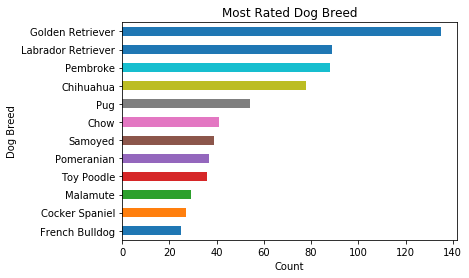

In [112]:
df_dog_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 25).sort_values('dog_breed',ascending=False)

df_dog_breed['dog_breed'].value_counts().sort_values().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Which dog breed had the highest rating (numerator) among other dog breeds?
Military Uniform has the highest rating (numerator) among other dog breeds, followed by Pole.

In [113]:
df_master.groupby('dog_breed').mean().sort_values(by='rating_numerator', ascending=False)[:10]

,rating_numerator,rating_denominator,img_num,pred_confidence,retweet_count,favorite_count
dog_breed,,,,,,
Military Uniform,14.0,10.0,3.0,0.853684,3532.0,12291.0
Pole,14.0,10.0,2.0,0.478616,7892.0,30067.0
Laptop,14.0,10.0,1.0,0.153718,12972.0,60552.0
Prison,14.0,10.0,2.5,0.629938,12601.0,32012.5
Pedestal,14.0,10.0,3.0,0.662660,3289.0,9195.0
Limousine,14.0,10.0,1.0,0.130432,10381.0,42495.0
Bannister,13.0,10.0,1.0,0.369449,799.0,2178.0
Barbell,13.0,10.0,1.0,0.971581,9387.0,31731.0
Upright,13.0,10.0,1.0,0.303415,15747.0,30799.0


### Which dog breed received the highest retweet and favourites counts?
* Arabian Camel and Conch have the highest retweet counts.
* Conch hits again and gain the 2nd rank in favourites count.

In [114]:
df_master.groupby('dog_breed').mean().sort_values(by='retweet_count', ascending=False)

,rating_numerator,rating_denominator,img_num,pred_confidence,retweet_count,favorite_count
dog_breed,,,,,,
Arabian Camel,10.000000,10.0,1.500000,0.682931,17334.000000,37482.500000
Conch,12.000000,10.0,3.000000,0.925621,17222.000000,43137.000000
Upright,13.000000,10.0,1.000000,0.303415,15747.000000,30799.000000
Bubble,10.000000,10.0,1.000000,0.618865,14817.000000,37212.000000
Gondola,9.000000,10.0,1.000000,0.226571,14283.500000,24606.000000
Angora,7.000000,10.0,1.000000,0.571526,13997.500000,42449.500000
Beaver,12.000000,10.0,2.000000,0.457094,13849.000000,34789.000000
Laptop,14.000000,10.0,1.000000,0.153718,12972.000000,60552.000000
Prison,14.000000,10.0,2.500000,0.629938,12601.000000,32012.500000


In [115]:
df_master.groupby('dog_breed').mean().sort_values(by='favorite_count', ascending=False)

,rating_numerator,rating_denominator,img_num,pred_confidence,retweet_count,favorite_count
dog_breed,,,,,,
Laptop,14.000000,10.0,1.000000,0.153718,12972.000000,60552.000000
Conch,12.000000,10.0,3.000000,0.925621,17222.000000,43137.000000
Limousine,14.000000,10.0,1.000000,0.130432,10381.000000,42495.000000
Angora,7.000000,10.0,1.000000,0.571526,13997.500000,42449.500000
Fountain,13.000000,10.0,1.000000,0.997509,8039.000000,40781.000000
Arabian Camel,10.000000,10.0,1.500000,0.682931,17334.000000,37482.500000
Bubble,10.000000,10.0,1.000000,0.618865,14817.000000,37212.000000
Orange,13.000000,10.0,1.000000,0.097049,7445.000000,35284.000000
Beaver,12.000000,10.0,2.000000,0.457094,13849.000000,34789.000000


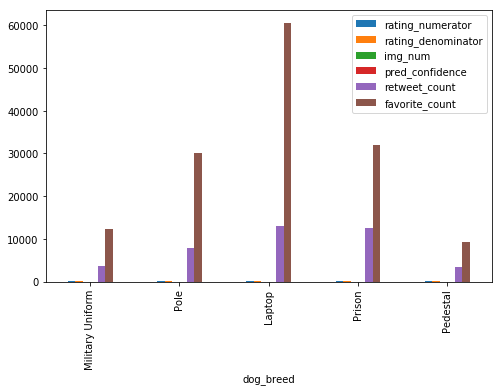

In [116]:
df_master.groupby('dog_breed').mean().sort_values(by='rating_numerator', ascending=False)[:5].plot(kind = 'bar', figsize=(8,5));

In [117]:
df_master.name.value_counts().sort_values(ascending=False)[:15]

Cooper     10
Oliver     10
Charlie    10
Tucker      9
Penny       9
Lucy        9
Winston     8
Sadie       8
Toby        7
Daisy       7
Lola        7
Bella       6
Jax         6
Koda        6
Bo          6
Name: name, dtype: int64

### Which dog stage had higher prediction confidence in image prediction data?
Puppo has the highest mean prediction confidence in image prediction data after the congramulate category of mixed dog stages "Multiple".

In [118]:
df_master.groupby('dog_stage').mean()

,rating_numerator,rating_denominator,img_num,pred_confidence,retweet_count,favorite_count
dog_stage,,,,,,
doggo,11.870968,10.0,1.290323,0.574147,6321.306452,18415.919355
floofer,12.000000,10.0,1.142857,0.609204,4204.000000,11748.285714
multiple,11.200000,10.0,1.100000,0.728075,5134.300000,16540.600000
pupper,10.635000,10.0,1.255000,0.604128,2042.025000,6547.295000
puppo,12.000000,10.0,1.454545,0.722293,5631.227273,20433.636364


### Which dog breed received the highest retweet and favourites counts?
Puppo Dod stage has the highest favourites count while Doggo has the highest tweet count.

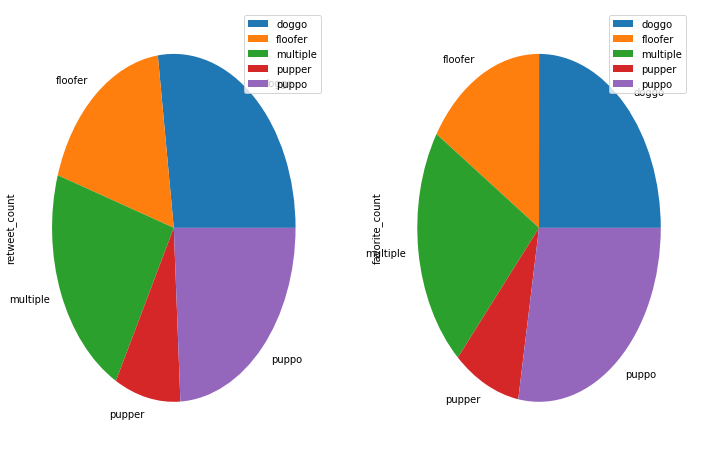

In [119]:
df_master.iloc[:,12:].groupby('dog_stage').mean().plot(subplots= True, kind='pie', figsize=(12,8));

### Which dog stage received higher rating?
Floofer and Puppo had the highest rating among other dog stages.

In [120]:
df_master.groupby('dog_stage').mean().sort_values(by='rating_numerator', ascending=False)

,rating_numerator,rating_denominator,img_num,pred_confidence,retweet_count,favorite_count
dog_stage,,,,,,
floofer,12.000000,10.0,1.142857,0.609204,4204.000000,11748.285714
puppo,12.000000,10.0,1.454545,0.722293,5631.227273,20433.636364
doggo,11.870968,10.0,1.290323,0.574147,6321.306452,18415.919355
multiple,11.200000,10.0,1.100000,0.728075,5134.300000,16540.600000
pupper,10.635000,10.0,1.255000,0.604128,2042.025000,6547.295000


### What is the most common dog name in this dataset?
Charlie, Oliver, and Cooper are the most common names of these dogs in this dataset.

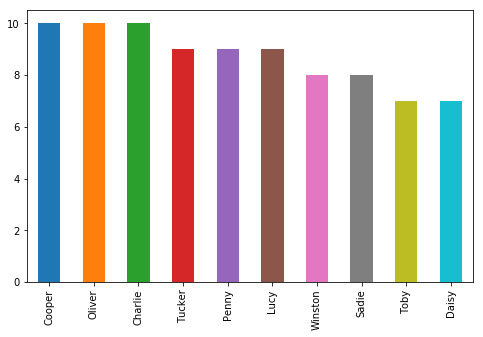

In [121]:
df_master.name.value_counts().sort_values(ascending=False)[:10].plot(kind='bar', figsize=(8,5));

### Is there is a correlation between retweet count and rating_numerator?
There is a positive linear correlation between retweet count and rating numerator

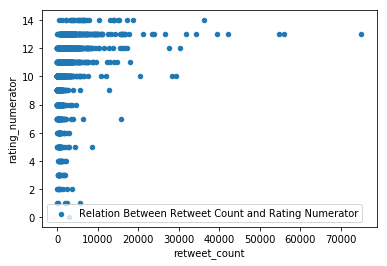

In [122]:
df_master.plot(label='Relation Between Retweet Count and Rating Numerator', x='retweet_count', y='rating_numerator', kind='scatter');